# 白化和归一化

In [46]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
def to_np(x):
    return x.detach().cpu().squeeze().numpy()

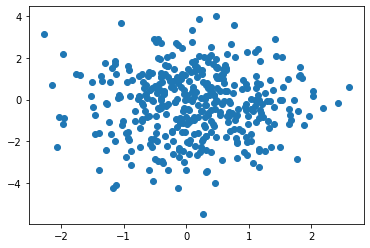

In [94]:
x = np.random.multivariate_normal(mean=[0.2,-0.2], cov=np.array([[0.7, 0], [0, 2.3]]), size=(400,))

plt.scatter(x[:,0], x[:,1])

x = torch.tensor(x).float()

x = x.view(-1, 2, 1, 1)

torch.Size([400, 2])


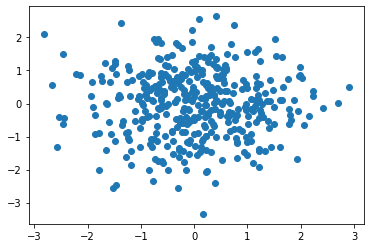

In [95]:
c = x.shape[1]

print(x.permute((0, 2, 3, 1)).view(-1, c).shape)

bn1d = nn.BatchNorm1d(2)
bn1d.train()
x1 = bn1d(x.permute((0, 2, 3, 1)).view(-1, c)).detach()

plt.scatter(x1[:,0], x1[:,1])


In [70]:
x_norm = F.normalize(x, p=2, dim=1)

In [71]:
bn = nn.BatchNorm2d(2)
bn.train()
x_bn = bn(x)

x_norm_bn = bn(x_norm)

x_bn_norm = F.normalize(x_bn, p=2, dim=1)

Text(0.5, 1.0, 'x_norm_bn')

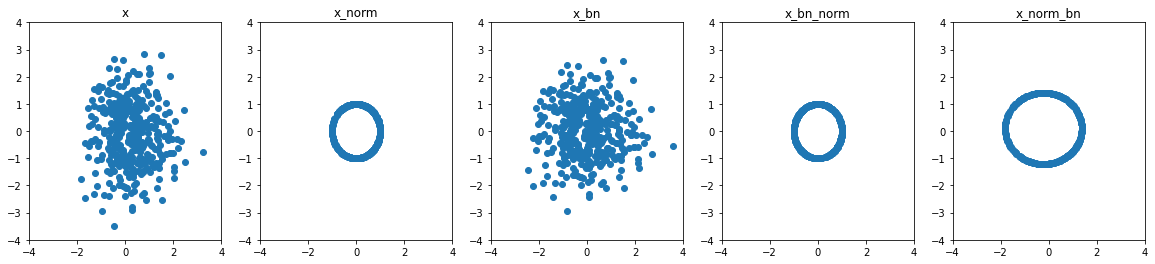

In [72]:
fig, axes = plt.subplots(1,5, figsize=(20,4))

for ax in axes:
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

axes[0].scatter(to_np(x)[:,0], to_np(x)[:,1])
axes[0].set_title("x")

axes[1].scatter(to_np(x_norm)[:,0], to_np(x_norm)[:,1])
axes[1].set_title("x_norm")

axes[2].scatter(to_np(x_bn)[:,0], to_np(x_bn)[:,1])
axes[2].set_title("x_bn")

axes[3].scatter(to_np(x_bn_norm)[:,0], to_np(x_bn_norm)[:,1])
axes[3].set_title("x_bn_norm")

axes[4].scatter(to_np(x_norm_bn)[:,0], to_np(x_norm_bn)[:,1])
axes[4].set_title("x_norm_bn")

In [97]:
x.shape

torch.Size([400, 2, 1, 1])

In [101]:
x.sum(dim=(0,1), keepdim=True).shape

torch.Size([1, 1, 1, 1])